# Problem Statement:

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Column Profiling:

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## 1.1 Additional Views:

* Identify which variables are significant in predicting the Attrition rate.
* Non-graphical and graphical analysis for getting inferences about variables.
* Check correlation among independent variables and how they interact with each other.
* Build a Bagging and Boosting  Model,
* To Provide actionable Insights & Recommendations.

## 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(context="notebook", style = 'darkgrid' , color_codes=True)
from datetime import datetime
import datetime as dt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_curve,plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder
import xgboost as xgb
from sklearn.metrics import roc_curve, auc,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold

In [2]:
df=pd.read_csv('OLA.csv')

In [3]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [4]:
df.astype('object').describe().transpose()

,count,unique,top,freq
Unnamed: 0,19104,19104,0,1
MMM-YY,19104,24,1/1/2019,1022
Driver_ID,19104,2381,2110,24
Age,19043.0,36.0,36.0,1283.0
Gender,19052.0,2.0,0.0,11074.0
City,19104,29,C20,1008
Education_Level,19104,3,1,6864
Income,19104,2383,48747,57
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


In [5]:
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,1/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,2/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,3/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,3/11/2019,1,1,0,2
3,3,11/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1
4,4,12/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1


In [6]:
#Removing unnamed column
df=df[['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
df.shape

(19104, 13)

In [9]:
# Checking Null Values
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

* There are null values present in dataframe for columns Age,Gender,LastWorkingDate columns

In [10]:
# Checking duplicate values
if (df.duplicated().sum() ==0):
    print("There are no duplicate values in given data")
else:
    print("There are duplicate values in given data")

There are no duplicate values in given data


In [11]:
# Checking Unique Values:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

### Insights:

* Given Data contains details of 2381 Driver Details
* Most of driver's age is around [30,39]
* Most of the drivers are Male
* C20 is the city code for most of the drivers
* Most of the drivers have education qualification of 10+
* Most of the drivers have Income around 60,000
* Most of the drivers are of Grade 2
* Most of the drivers have got the 1 as their quarterly rating
* There are null values present in dataframe for columns Age,Gender,LastWorkingDate columns

## 1.3 UniVariate Analysis

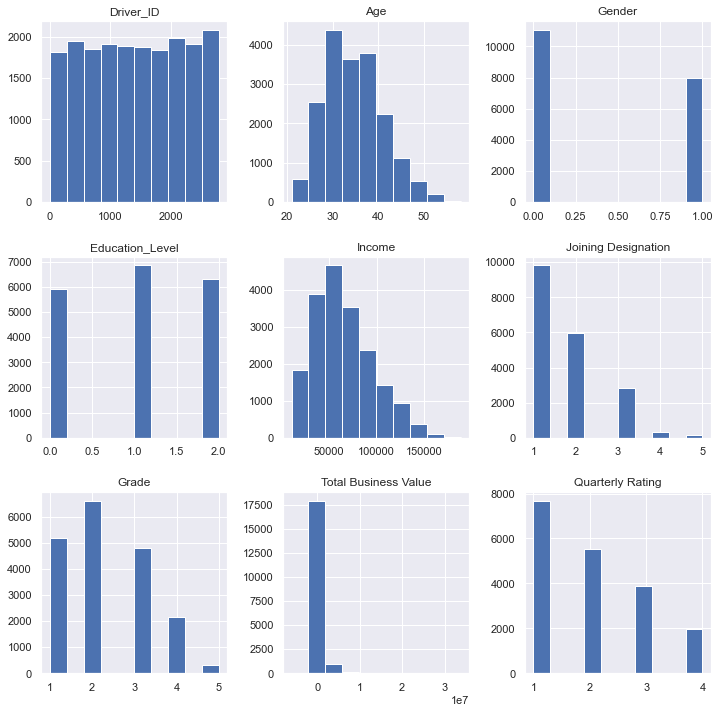

In [12]:
df.hist(figsize = (12,12))
plt.show()

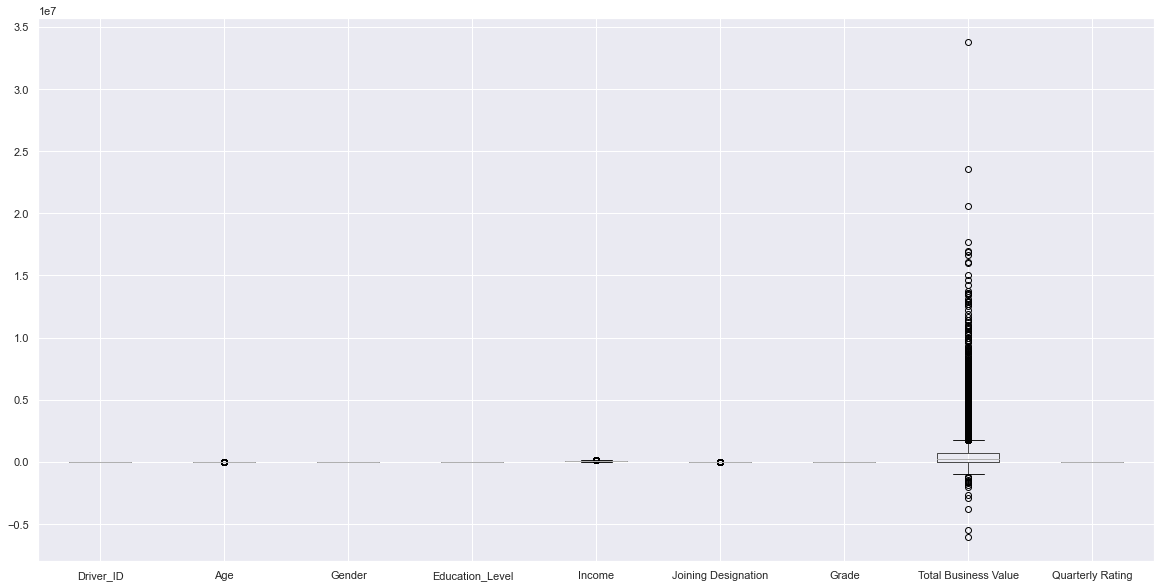

In [13]:
# Checking for outliers
df.boxplot(figsize = (20,10))
plt.show()

* Large number of outliers present TotalBusinessValue column

In [14]:
cat_col=['MMM-YY', 'City']

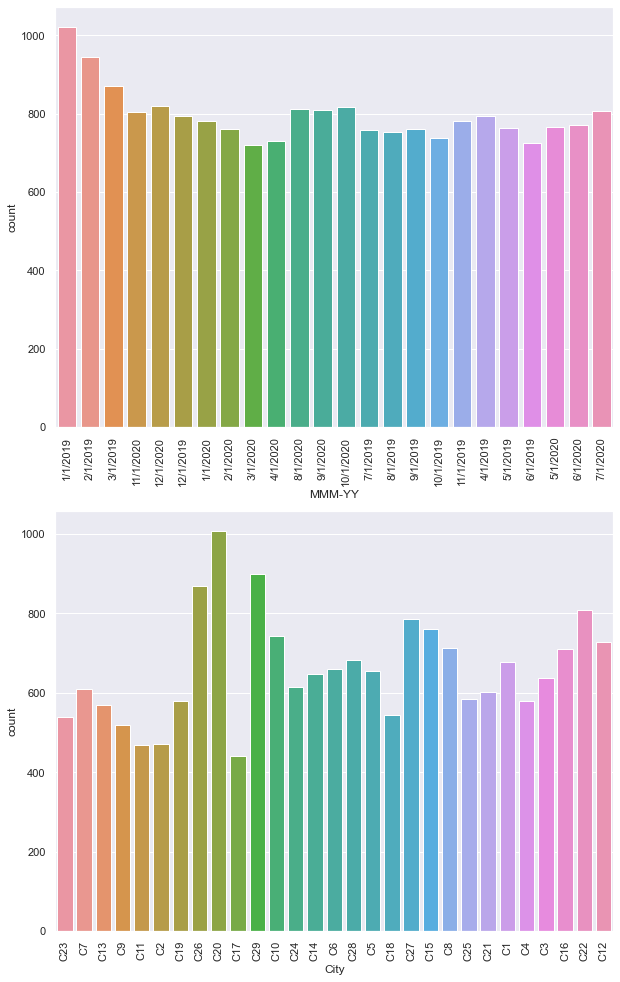

In [15]:
fig, axes = plt.subplots(len(cat_col), figsize=(10, 17))
for i in range(len(cat_col)):
    g=sns.countplot(df[cat_col[i]],ax=axes[i])
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

### Converting Dateofjoining and LastWorkingDate to Date time objects

In [16]:
def year(i):
    if i!='NaN':
        x=i.split('/')
        if len(x[-1])==2:
            return x[0]+'/'+x[1]+'/'+'20'+x[-1]
        else:
            return i
    else:
        return 'NaN'


In [17]:
def month(i):
    if i!='NaN':
        x=i.split('/')
        if len(x[1])==2:
            return i
        else:
            return x[0]+'/'+'0'+x[1]+'/'+x[2]
    else:
        return 'NaN'

In [18]:
def date(i):
    if i!='NaN':
        x=i.split('/')
        if len(x[0])==2:
            return i
        else:
            return '0'+x[0]+'/'+x[1]+'/'+x[2]
    else:
        return 'NaN'

In [19]:
df['Dateofjoining']=df['Dateofjoining'].apply(year)
df['Dateofjoining']=df['Dateofjoining'].apply(month)
df['Dateofjoining']=df['Dateofjoining'].apply(date)

In [20]:
df['LastWorkingDate']=df['LastWorkingDate'].fillna('NaN')

In [21]:
df['LastWorkingDate']=df['LastWorkingDate'].apply(year)
df['LastWorkingDate']=df['LastWorkingDate'].apply(month)
df['LastWorkingDate']=df['LastWorkingDate'].apply(date)

In [22]:
df['Dateofjoining']= pd.to_datetime(df['Dateofjoining'].str.strip(), format='%d/%m/%Y')

In [23]:
df['LastWorkingDate']= pd.to_datetime(df['LastWorkingDate'].str.strip(), format='%d/%m/%Y')

In [24]:
df['Joining_year'] = df['Dateofjoining'].dt.year
df['Joining_month'] = df['Dateofjoining'].dt.month

In [25]:
df['Leaving_year'] = df['LastWorkingDate'].dt.year
df['Leaving_month'] = df['LastWorkingDate'].dt.month

<AxesSubplot:xlabel='Joining_year', ylabel='count'>

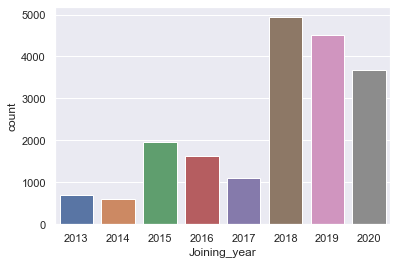

In [26]:
sns.countplot(df['Joining_year'])

<AxesSubplot:xlabel='Joining_year', ylabel='count'>

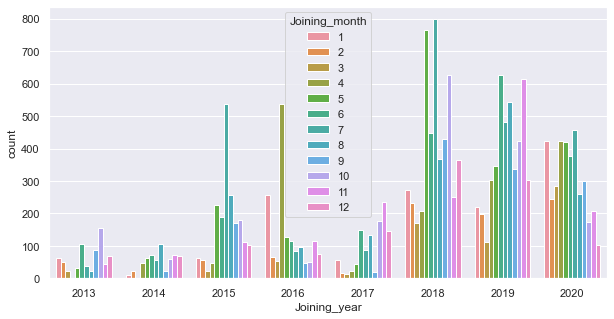

In [27]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(df['Joining_year'],hue=df['Joining_month'])

<AxesSubplot:xlabel='Leaving_year', ylabel='count'>

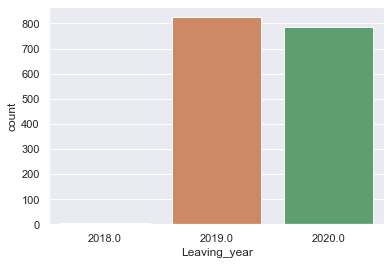

In [28]:
sns.countplot(df['Leaving_year'])

<AxesSubplot:xlabel='Leaving_year', ylabel='count'>

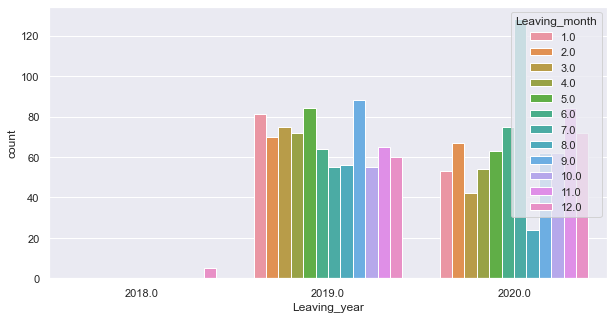

In [29]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(df['Leaving_year'],hue=df['Leaving_month'],)

In [30]:
df['MMM-YY']=df['MMM-YY'].apply(year)
df['MMM-YY']=df['MMM-YY'].apply(month)
df['MMM-YY']=df['MMM-YY'].apply(date)

In [31]:
df['MMM-YY']= pd.to_datetime(df['MMM-YY'].str.strip(), format='%d/%m/%Y')

## 1.4 BI Variate Analysis

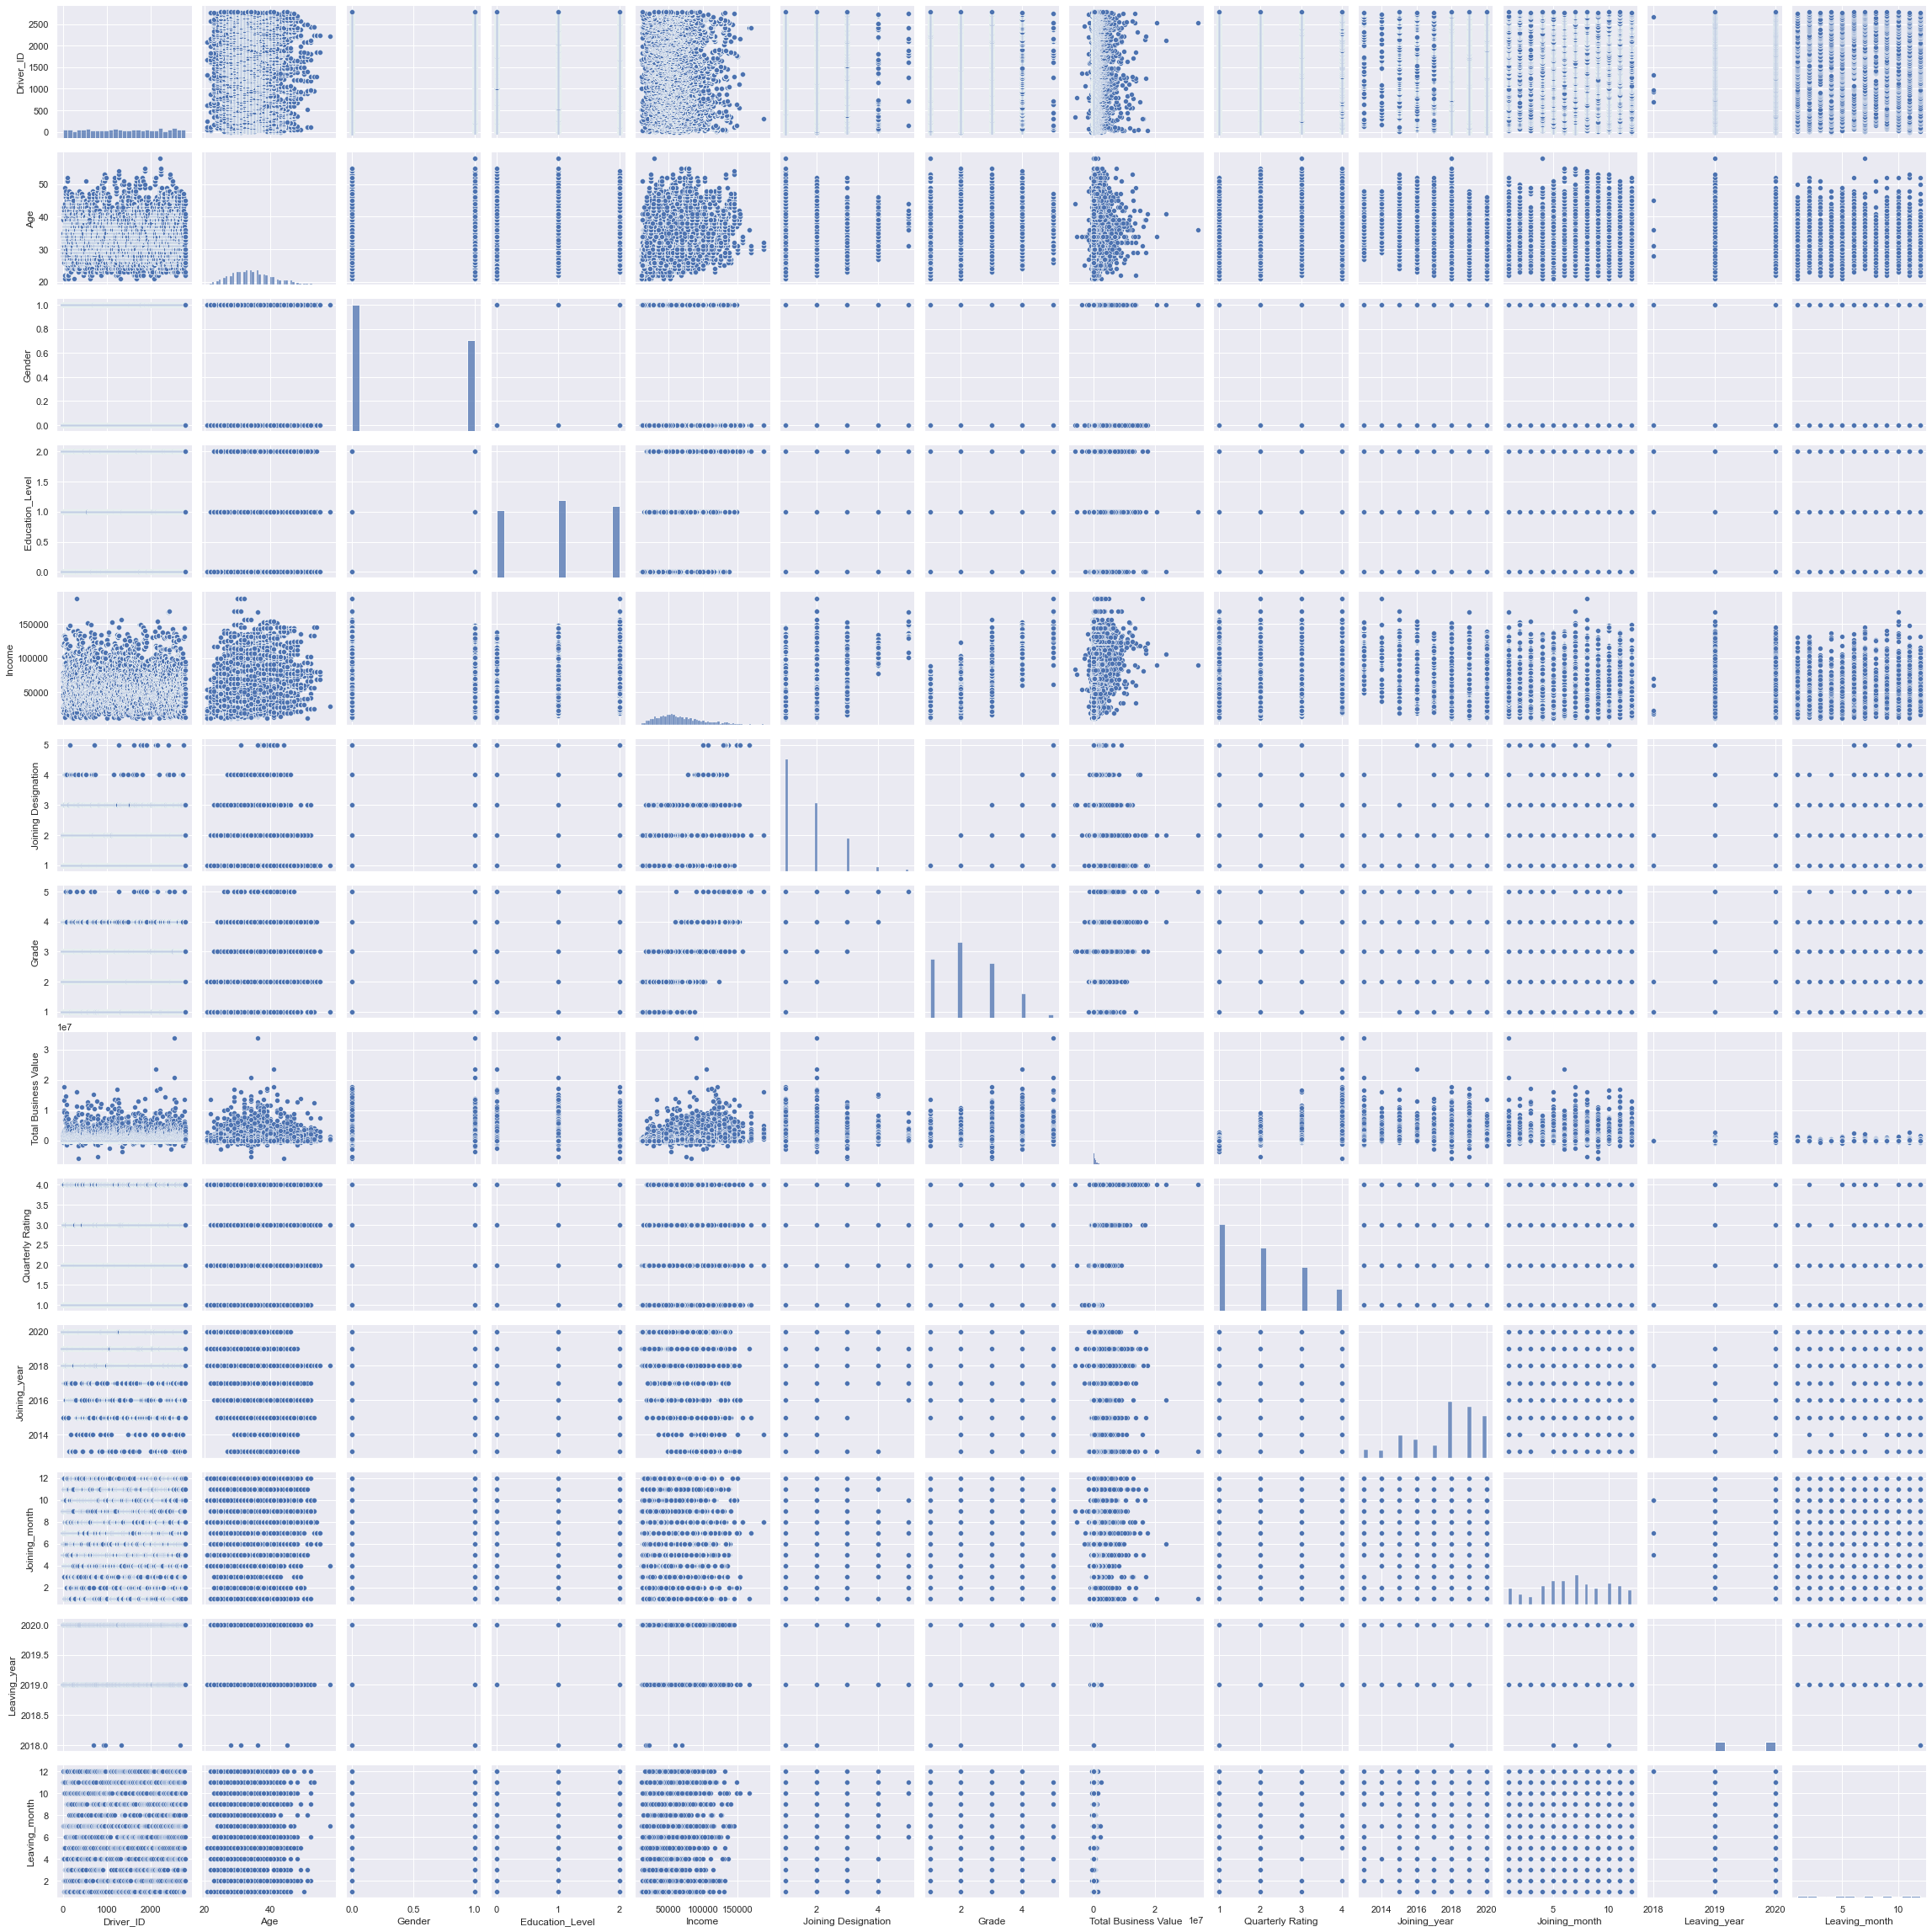

In [32]:
sns.pairplot(df)

<AxesSubplot:>

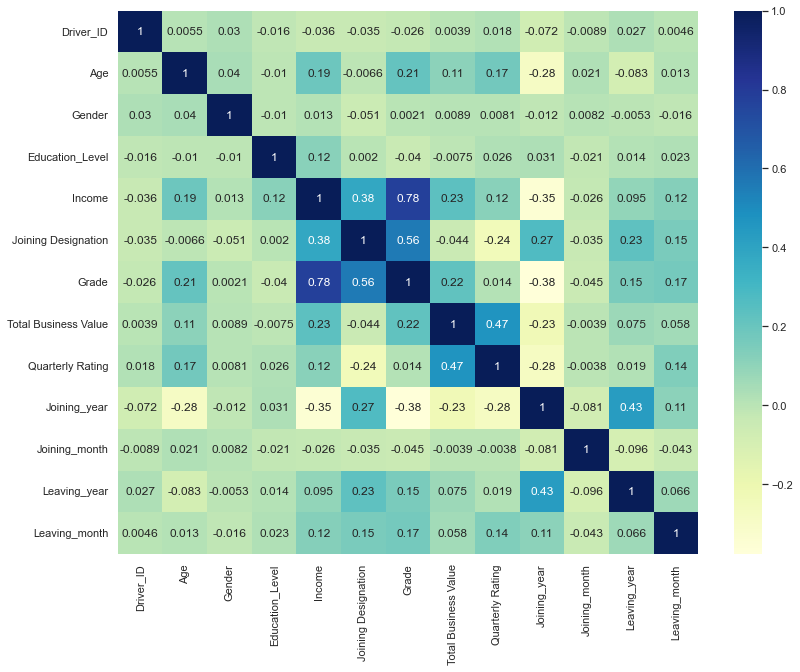

In [33]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


<AxesSubplot:xlabel='Age', ylabel='Income'>

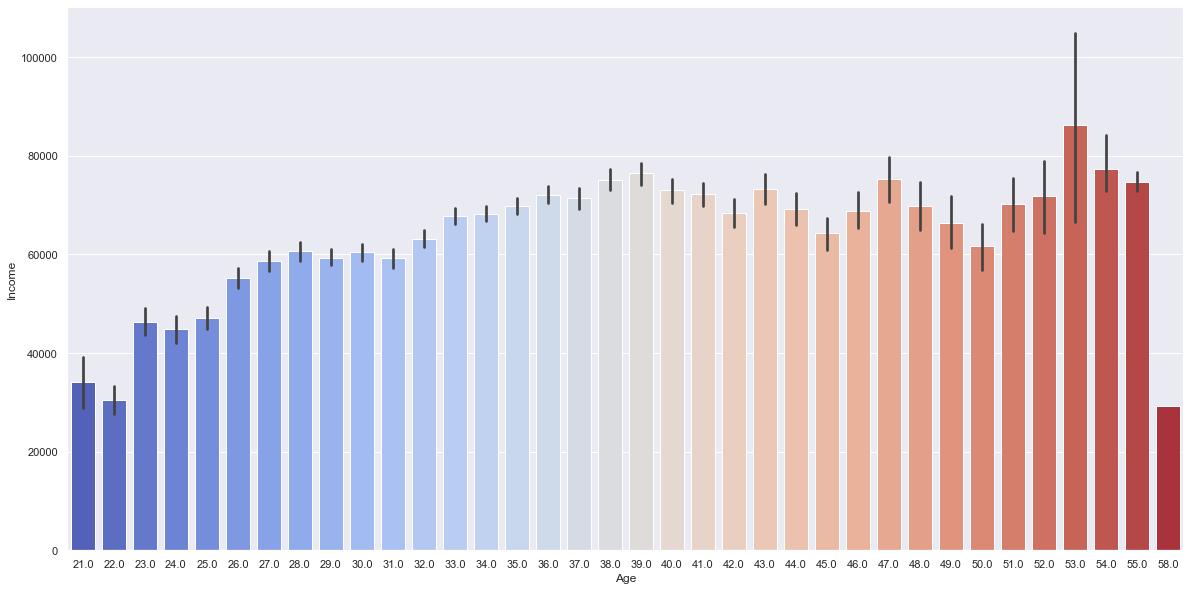

In [34]:
fig, axes = plt.subplots( figsize=(20,10))
sns.barplot(df['Age'],df['Income'],palette ='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='Total Business Value'>

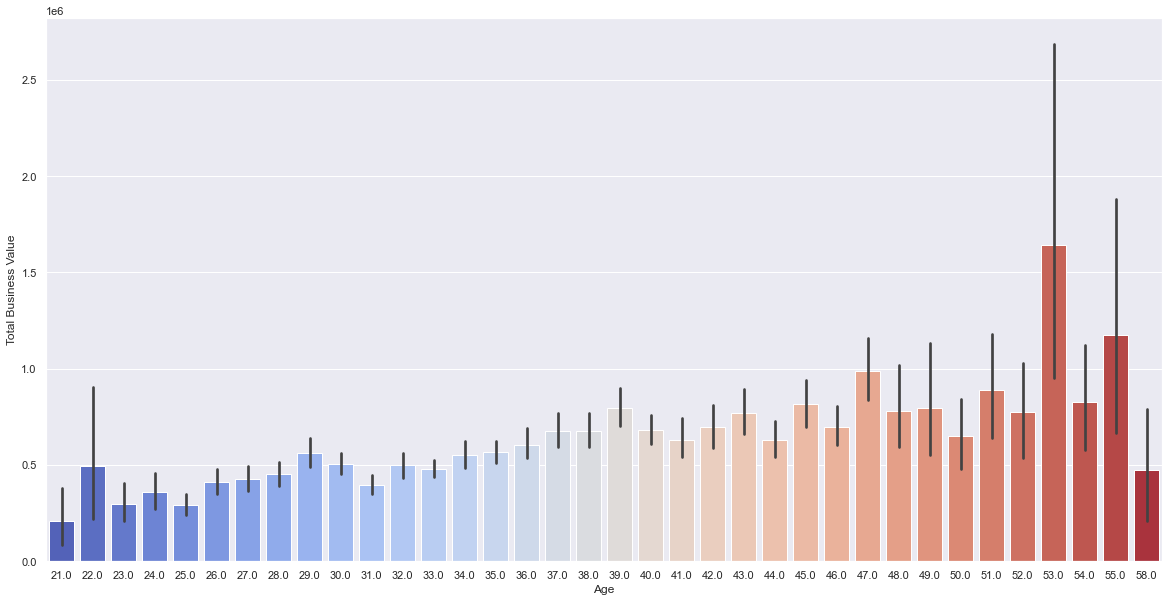

In [35]:
fig, axes = plt.subplots( figsize=(20,10))
sns.barplot(df['Age'],df['Total Business Value'],palette ='coolwarm')

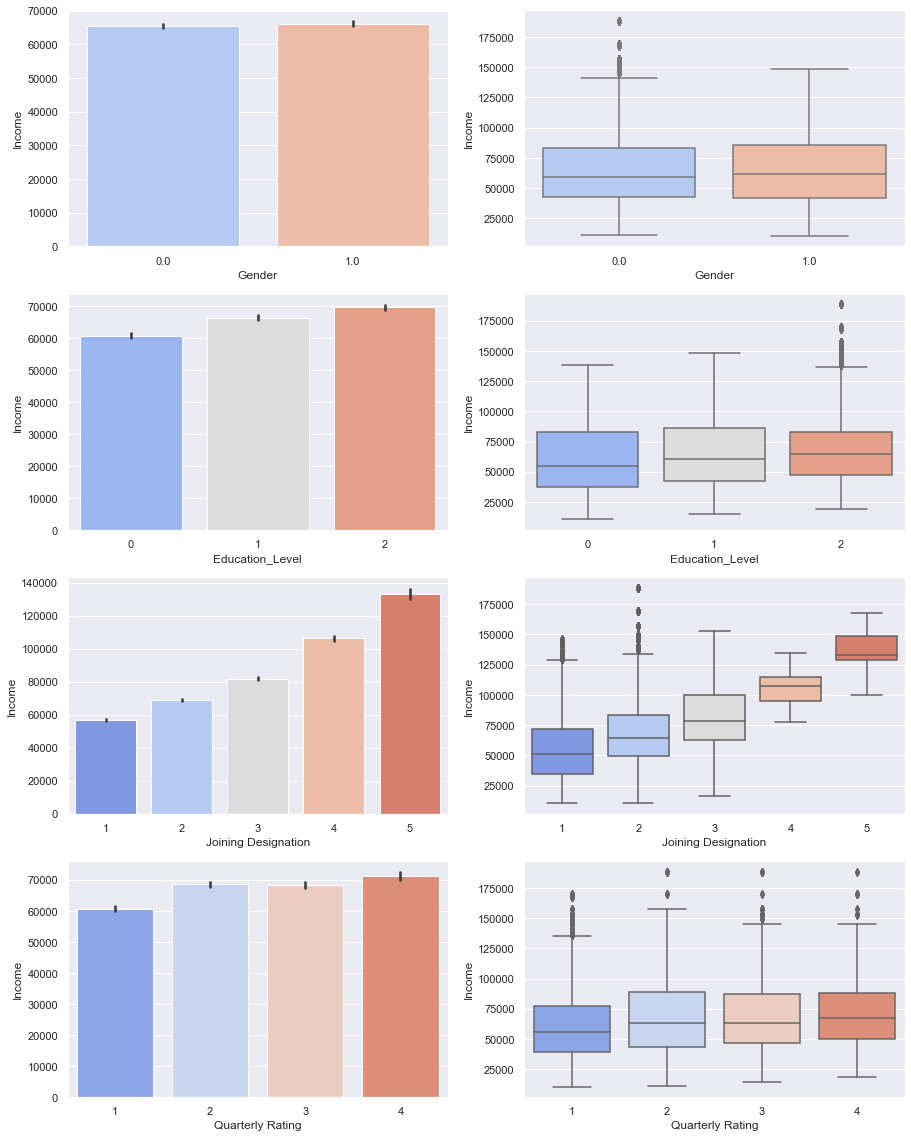

In [36]:
c=['Gender', 'Education_Level', 'Joining Designation', 'Quarterly Rating']
fig, axes = plt.subplots(len(c),2, figsize=(15,20))
for i in range(len(c)):
    sns.barplot(df[c[i]],df['Income'],ax=axes[i,0],palette ='coolwarm')
    sns.boxplot(df[c[i]],df['Income'],ax=axes[i,1],palette ='coolwarm')

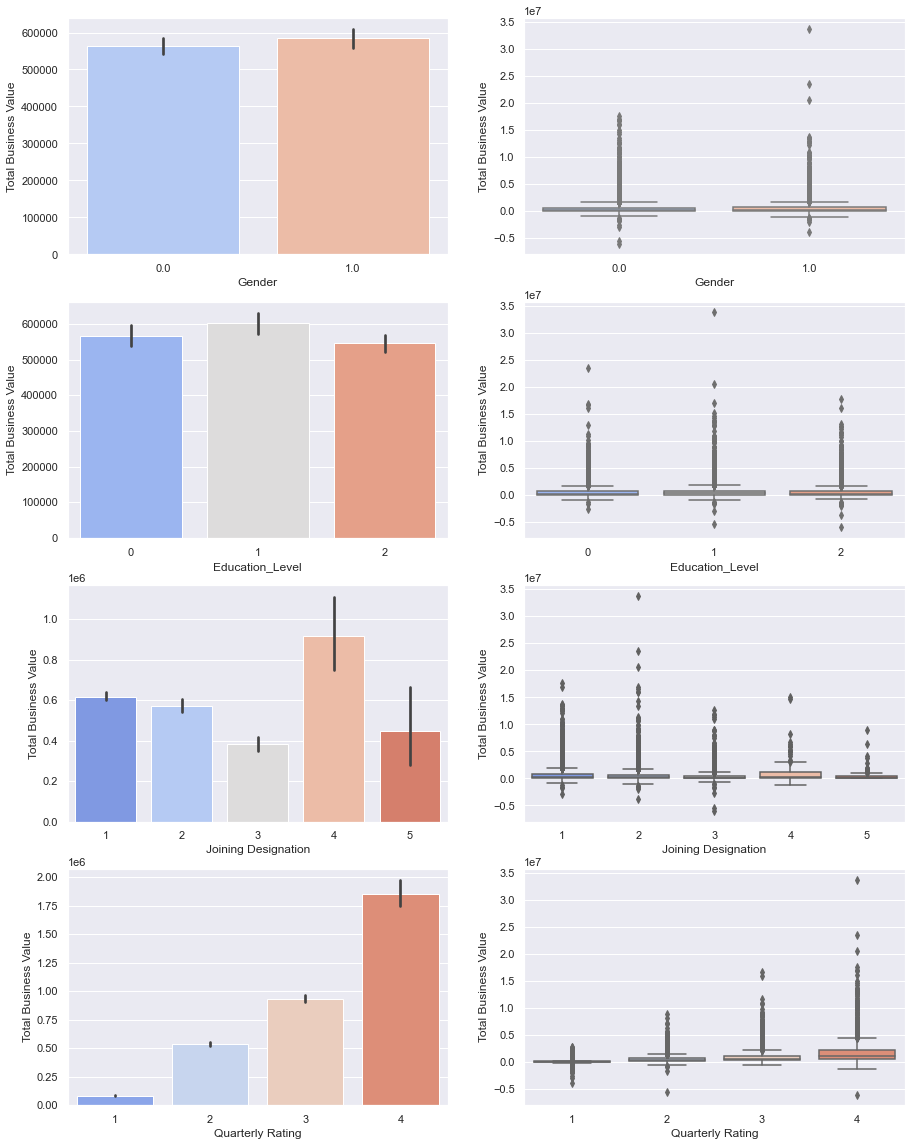

In [37]:
fig, axes = plt.subplots(len(c),2, figsize=(15,20))
for i in range(len(c)):
    sns.barplot(df[c[i]],df['Total Business Value'],ax=axes[i,0],palette ='coolwarm')
    sns.boxplot(df[c[i]],df['Total Business Value'],ax=axes[i,1],palette ='coolwarm')

In [38]:
c1=['Quarterly Rating','Gender','Education_Level','Grade','Joining Designation']

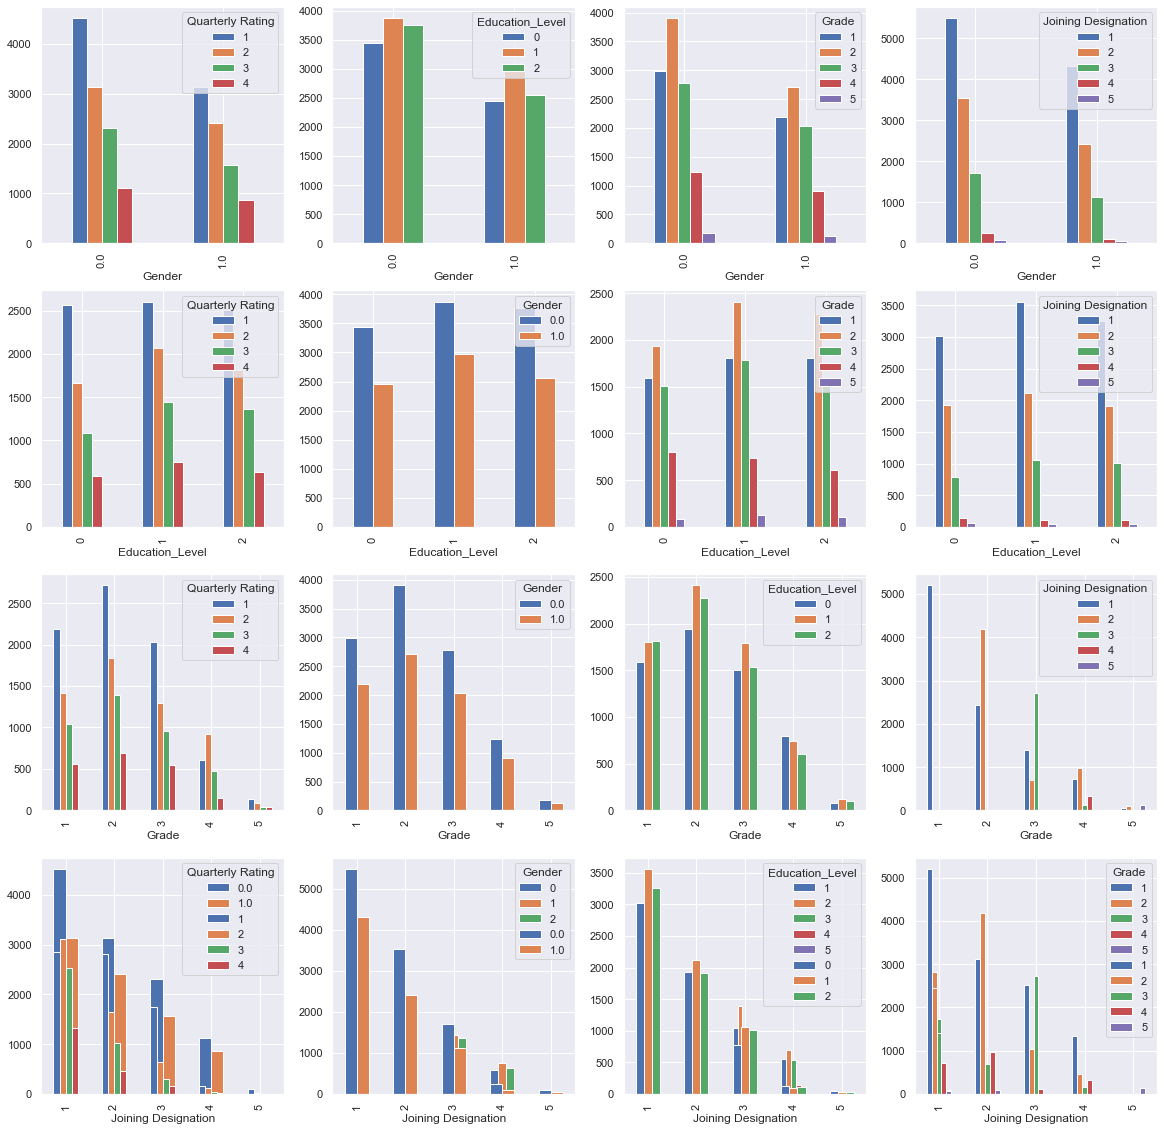

In [39]:
fig, axes = plt.subplots(len(c1)-1,len(c1)-1, figsize=(20,20))
for i in range(len(c1)):
    count=0
    for j in range(len(c1)):
        if i!=j:
            pd.crosstab(df[c1[i]],df[c1[j]]).plot.bar(ax=axes[i-1,count])
            count+=1

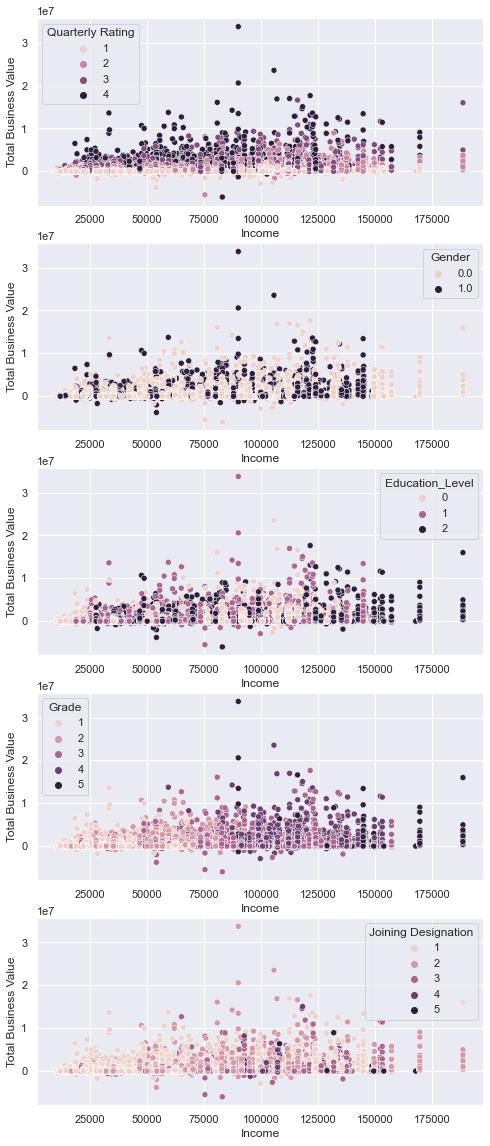

In [40]:
fig, axes = plt.subplots(len(c1), figsize=(8,20))
for i in range(len(c1)):

    sns.scatterplot(x=df['Income'],y=df['Total Business Value'],hue=df[c1[i]],ax=axes[i])


## 1.5 Illustrate the insights based on EDA
* Comments on range of attributes, outliers of various attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots

1. Age colum is right skewed normal distribution
2. Most of the drivers are of Age 30-32
3. More number of drivers join OLA in 2018,2019 & 2020
4. Large number of drivers left OLA in 2019 & 2020
5. Income and Grade are highly positively correlated with each other
6. Income and Joining Designation are weakly positively correlated with each other
7. Joining Designation and Grade are positively correlated with each other
8. Quarterly Rating is correlated with Total business Value
9. Age is Weakly positive correlated with Income,Grade and Quarterly rating
10. People with Age 53 have the highest income and Total Business Value compared to other ages
11. Incomes for Male and Female are Equal
12. Income for Graduates is slightly higher than 12+ and 10+
13. Drivers with Higher Joining Designation has Higher Income
14. Drivers having Quarterly ratings 2,3,4 have little difference in their incomes
15. Female Drivers have high Business value compared to Male Drivers
16. Drivers having 12+ qualification has high Business value compared to others
17. Drivers who have their Joining Designation and Quarterly Rating as 4 have higher Business Value
18. Grade 2 Drivers are highly educated compared to the other grades
19. Most of the Females belong to  Grade 2 and 3,1, o
20. Grade 1 people will have joining designation as 1, Grade 2 people will have either 1/2
21. People whose Business Value low has low income and quarterly rating as one
22. Most people having high income and Business value are men
23. Gradel drivers has less business value and income

# 2.Data Preprocessing 

In [41]:
df['Income_First']=df['Income']
df['Grade_First']=df['Grade']

In [42]:
df=df[['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating','Income_First',
       'Grade_First']]

In [43]:
 #aggregating data
agg_func_selection = {
    
'MMM-YY':'last'  ,                           
'Age':'last'    ,                     
'Gender':'last'  ,                   
'City':'last'  ,                     
'Education_Level':'last' ,             
'Income':'last'  ,                     
'Dateofjoining' :'last'    ,     
'LastWorkingDate':'last'   ,
'Joining Designation':'last',
'Grade':'last'  ,   
'Income_First':'first'  , 
'Grade_First':'first',
'Total Business Value':'sum'    , 
'Quarterly Rating':'last'  ,  
        }

In [44]:
df1=pd.DataFrame(df.groupby(['Driver_ID']).agg(agg_func_selection))

In [45]:
df1=df1.reset_index()

In [46]:
df1.head(10)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Income_First,Grade_First,Total Business Value,Quarterly Rating
0,1,2019-01-03,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,57387,1,1715580,2
1,2,2020-01-12,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,67016,2,0,1
2,4,2020-01-04,43.0,0.0,C13,2,65603,2019-07-12,2020-04-27,2,2,65603,2,350000,1
3,5,2019-01-03,29.0,0.0,C9,0,46368,2019-09-01,2019-07-03,1,1,46368,1,120360,1
4,6,2020-01-12,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,78728,3,1265000,2
5,8,2020-01-11,34.0,0.0,C2,0,70656,2020-09-19,2020-11-15,3,3,70656,3,0,1
6,11,2020-01-12,28.0,1.0,C19,2,42172,2020-07-12,NaT,1,1,42172,1,0,1
7,12,2019-01-12,35.0,0.0,C23,2,28116,2019-06-29,2019-12-21,1,1,28116,1,2607180,1
8,13,2020-01-11,31.0,0.0,C19,2,119227,2015-05-28,2020-11-25,1,4,119227,4,10213040,1
9,14,2020-01-12,39.0,1.0,C26,0,19734,2020-10-16,NaT,3,3,19734,3,0,1


In [47]:
df1.isna().sum()

Driver_ID                 0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Income_First              0
Grade_First               0
Total Business Value      0
Quarterly Rating          0
dtype: int64

* All the null values of Age and Gender are automatically handled by Aggregation and LastWorking day Nullvalues are reduced to Great extent

## 2.1 KNN imputer for missing numeric variables

In [48]:
df_1=df

In [49]:
df_1.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Income_First                0
Grade_First                 0
dtype: int64

In [50]:
imputer=KNNImputer(n_neighbors=5)
df_2=imputer.fit_transform(df_1[['Age','Gender']])

In [51]:
df_2 = pd.DataFrame(df_2)

In [52]:
df_2.head(10)

,0,1
0,28.0,0.0
1,28.0,0.0
2,28.0,0.0
3,31.0,0.0
4,31.0,0.0
5,43.0,0.0
6,43.0,0.0
7,43.0,0.0
8,43.0,0.0
9,43.0,0.0


In [53]:
df_1['Age']=df_2[0]
df_1['Gender']=df_2[1]

In [54]:
df_1=pd.DataFrame(df_1.groupby(['Driver_ID']).agg(agg_func_selection))

In [55]:
df_1.isnull().sum()

MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Income_First              0
Grade_First               0
Total Business Value      0
Quarterly Rating          0
dtype: int64

### Comparing the results of Aggregation and KNN Imupation 

In [56]:
if df_1['Gender'].equals(df1['Gender']):
    print('KNN Imputer and aggregator results are matching')
else:
    print('KNN Imputer and aggregator results are not matching')  

KNN Imputer and aggregator results are not matching


In [57]:
if df_1['Age'].equals(df1['Age']):
    print('KNN Imputer and aggregator results are matching')
else:
    print('KNN Imputer and aggregator results are not matching')  

KNN Imputer and aggregator results are not matching


* KNN Imputer and aggregator results are not matching but however we go with Aggregated data Cause that is the correct data

## Feature Engineering 

* Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

* Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

* Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [58]:
#  Creating Income_inc and Grade_inc to check if if income and grade is increased or not
df1['Income_inc']=df1['Income']>df1['Income_First']
df1['Grade_inc']=df1['Grade']>df1['Grade_First']

In [59]:
df1['Grade_inc'] = df1['Grade_inc'].apply(lambda x: 1 if x == True else 0)
df1['Income_inc'] = df1['Income_inc'].apply(lambda x: 1 if x == True else 0)

In [60]:
df1[df1['Grade_inc']==1].head(5)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Income_First,Grade_First,Total Business Value,Quarterly Rating,Income_inc,Grade_inc
18,26,2020-01-12,43.0,0.0,C14,2,132577,2018-07-05,NaT,1,4,121529,3,69867900,2,1,1
40,54,2020-01-12,35.0,0.0,C29,1,127826,2019-11-07,NaT,4,5,117993,4,33823290,1,1,1
46,60,2020-01-12,48.0,1.0,C20,0,89592,2016-09-17,NaT,1,4,82126,3,49225520,2,1,1
80,98,2020-01-12,25.0,0.0,C16,0,63774,2019-08-15,2020-12-25,2,3,57977,2,21415440,2,1,1
230,275,2020-01-12,41.0,0.0,C20,0,97226,2016-02-05,NaT,1,4,89124,3,33697790,3,1,1


In [61]:
# Target Variable creation
df1['Attrition'] = df1['LastWorkingDate'].apply(lambda x: 1 if str(x) == 'NaT' else 0)

In [62]:
df1['Attrition'].value_counts()

0    1616
1     765
Name: Attrition, dtype: int64

In [63]:
df1['Grade_inc'].value_counts()

0    2338
1      43
Name: Grade_inc, dtype: int64

In [64]:
df1.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Income_First,Grade_First,Total Business Value,Quarterly Rating,Income_inc,Grade_inc,Attrition
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,59209.060899,2.078538,4.586742e+06,1.427971,0.018060,0.018060,0.321294
std,806.161628,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,28275.899087,0.931321,9.127115e+06,0.809839,0.133195,0.133195,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,10747.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,39104.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,55276.000000,2.000000,8.176800e+05,1.000000,0.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,75765.000000,3.000000,4.173650e+06,2.000000,0.000000,0.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,188418.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


In [65]:
df1.astype('object').describe().transpose()

,count,unique,top,freq
Driver_ID,2381,2381,1,1
MMM-YY,2381,24,2020-01-12 00:00:00,819
Age,2381.0,36.0,32.0,172.0
Gender,2381.0,2.0,0.0,1404.0
City,2381,29,C20,152
Education_Level,2381,3,2,802
Income,2381,2339,48747,3
Dateofjoining,2381,869,2020-07-31 00:00:00,31
LastWorkingDate,1616,493,2020-07-29 00:00:00,70
Joining Designation,2381,5,1,1026


## Identify which variables are significant in predicting the Attrition rate.

<AxesSubplot:>

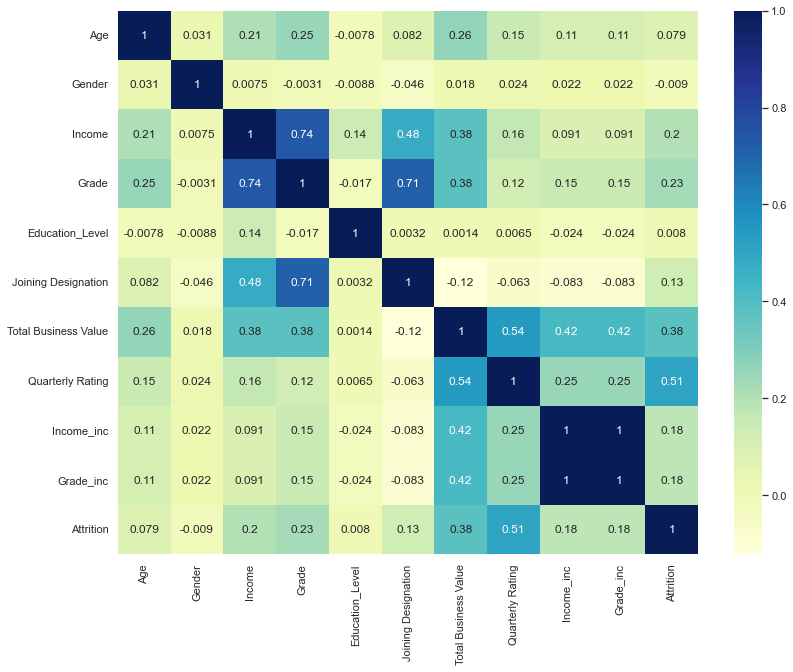

In [66]:
plt.figure(figsize=(13, 10))
sns.heatmap(df1[[ 'Age', 'Gender','Income','Grade','City', 'Education_Level', 'Joining Designation', 'Total Business Value','Quarterly Rating', 'Income_inc', 'Grade_inc', 'Attrition']].corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:xlabel='Grade_inc'>

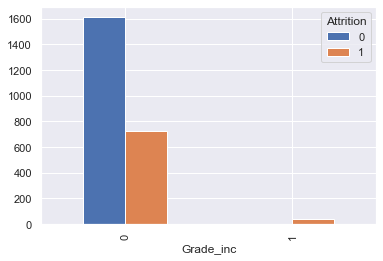

In [67]:
pd.crosstab(df1['Grade_inc'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Income_inc'>

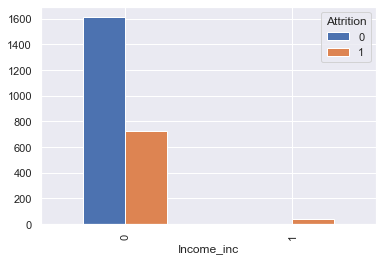

In [68]:
pd.crosstab(df1['Income_inc'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Gender'>

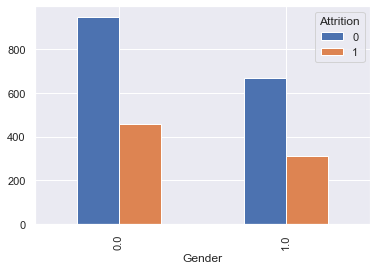

In [69]:
pd.crosstab(df1['Gender'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Age'>

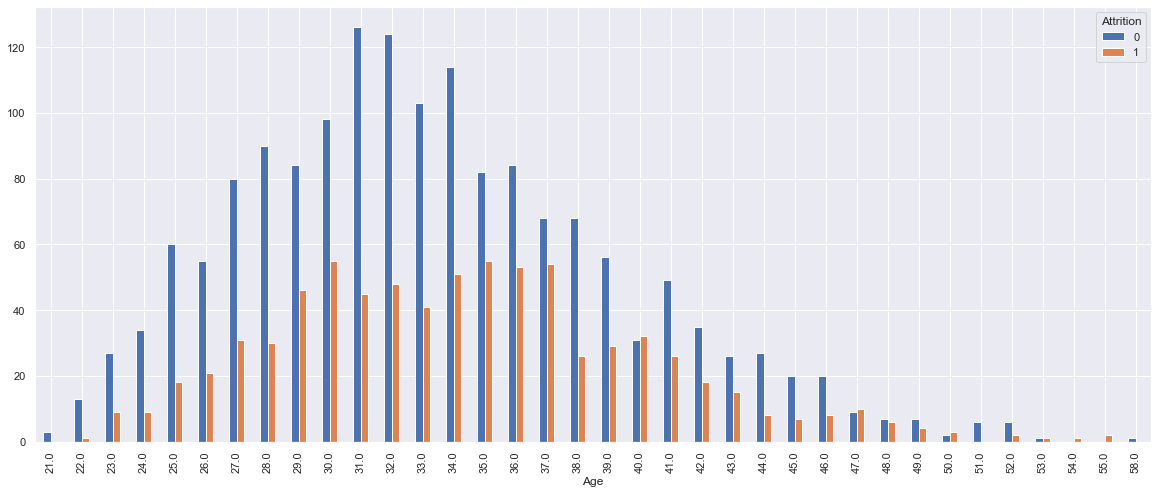

In [70]:
pd.crosstab(df1['Age'],df1['Attrition']).plot.bar(figsize=(20,8))

<AxesSubplot:xlabel='City'>

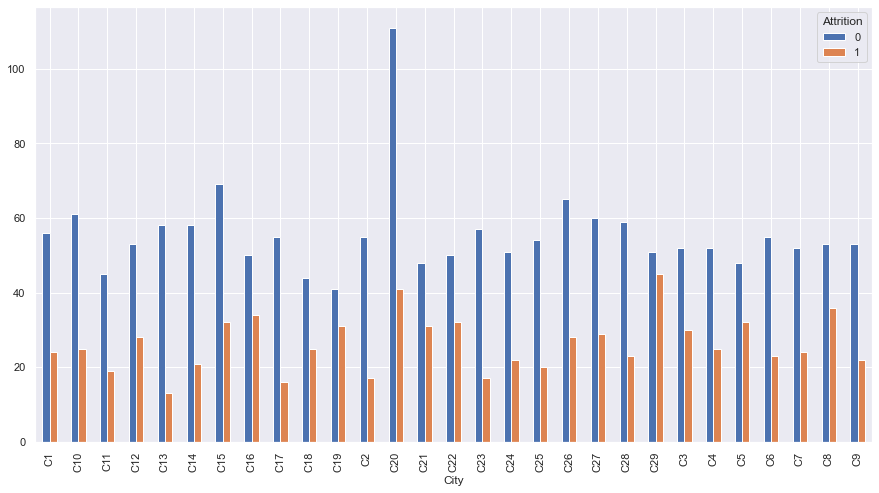

In [71]:
pd.crosstab(df1['City'],df1['Attrition']).plot.bar(figsize=(15,8))

<AxesSubplot:xlabel='Education_Level'>

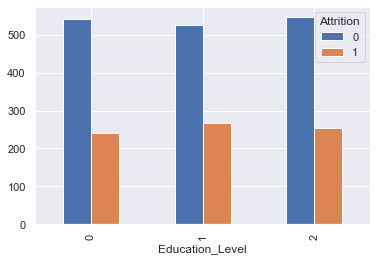

In [72]:
pd.crosstab(df1['Education_Level'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Joining Designation'>

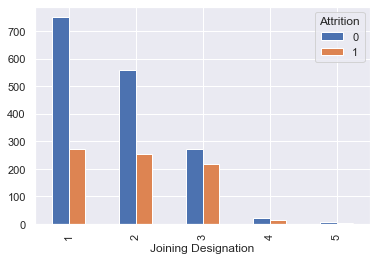

In [73]:
pd.crosstab(df1['Joining Designation'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Grade'>

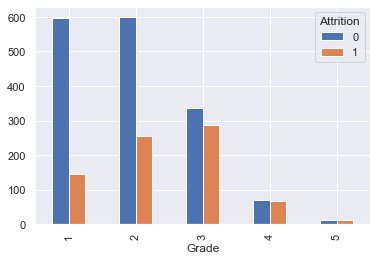

In [74]:
pd.crosstab(df1['Grade'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Quarterly Rating'>

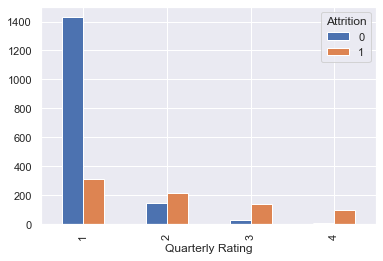

In [75]:
pd.crosstab(df1['Quarterly Rating'],df1['Attrition']).plot.bar()

<AxesSubplot:xlabel='Attrition', ylabel='Total Business Value'>

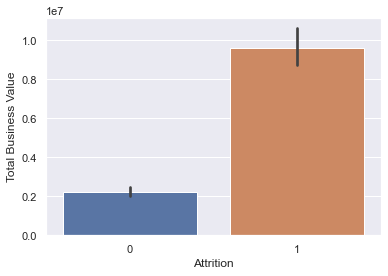

In [76]:
sns.barplot(df1['Attrition'],df1['Total Business Value'])

#### Insights:
* Income Inc and Grade Inc columns are correalted in same way with all other variables 
* Most of the employees leaving OLA are whose grade and income was not increased
* Most of the employees leaving OLA  are men. but the ratio of people not leaving to ratio of leaving id high for women 
* Most of the employees leaving OLA  are of high business value
* Employees leaving OLA  are of high business value
* Most of the people leaving OLA are of age group 29-37
* C29 city has highest attrition rate compared to other cities
* All the education levels have almost same attrition rate
* Grade, Joining Designation of levels 1,2,3  have high attrition rate.
* Attrition is postively correlated with Quartely rating,Total Bussiness Value 

## Outlier Treatment

In [77]:
df3=df1
q3=df3['Total Business Value'].quantile(0.75)
q1=df3['Total Business Value'].quantile(0.25)
iqr=q3-q1
df3=df3[(df3['Total Business Value']>=q1-(1.5*iqr)) & (df3['Total Business Value']<=q3+(1.5*iqr))]

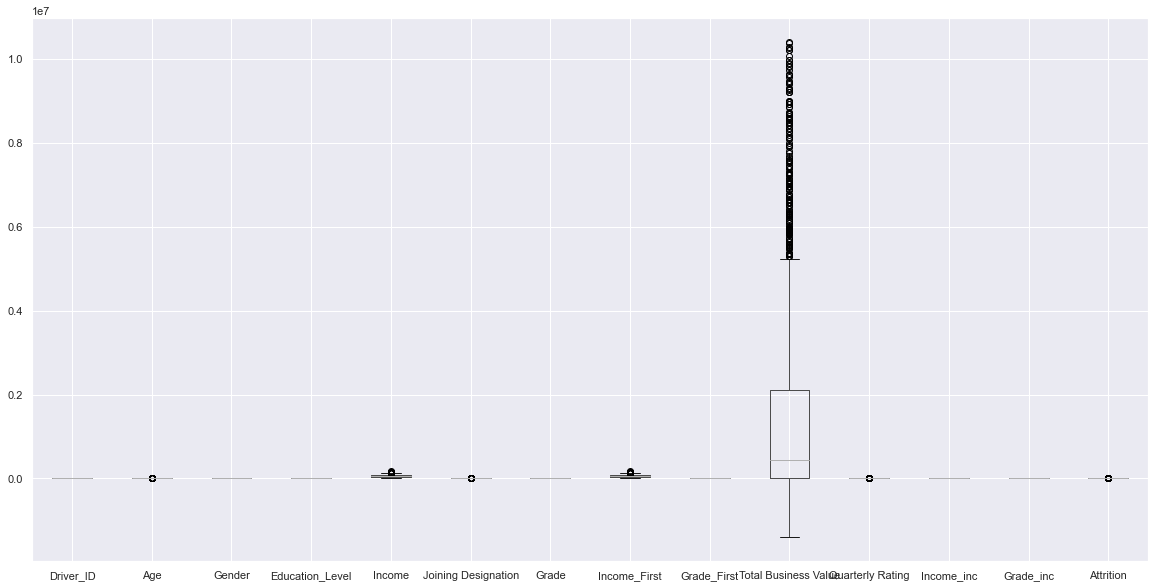

In [78]:
df3.boxplot(figsize = (20,10))
plt.show()

In [79]:
len(df3)

2045

## Standardization

In [80]:
#dropping unneccesary columns
# We can take either Grade_inc or Income _inc as they are highly correalted and have same correlation with rest other variables
df2=df1[[ 'Age', 'Gender','Income','Grade','City', 'Education_Level', 'Joining Designation', 'Total Business Value','Quarterly Rating', 'Income_inc', 'Attrition']]
df3=df3[[ 'Age', 'Gender','Income','Grade','City', 'Education_Level', 'Joining Designation', 'Total Business Value','Quarterly Rating', 'Income_inc', 'Attrition']]

In [81]:
df2.nunique()

Age                       36
Gender                     2
Income                  2339
Grade                      5
City                      29
Education_Level            3
Joining Designation        5
Total Business Value    1629
Quarterly Rating           4
Income_inc                 2
Attrition                  2
dtype: int64

In [82]:
numeric_col=['Age','Total Business Value','Income']

In [83]:
for i in numeric_col:
    df2[i] = StandardScaler().fit_transform(df2[[i]])
    df3[i] = StandardScaler().fit_transform(df3[[i]])

## Encoding Categorical Variables

In [84]:
df2 = pd.get_dummies(df2,columns=['Education_Level','Joining Designation','Quarterly Rating','Grade'])
df3 = pd.get_dummies(df3,columns=['Education_Level','Joining Designation','Quarterly Rating','Grade'])

# Model building

In [85]:
Y = df2["Attrition"]
X = df2.drop(["Attrition"], axis = 1)
Y1 = df3["Attrition"]
X1 = df3.drop(["Attrition"], axis = 1)

In [86]:
Y.value_counts(normalize=True)

0    0.678706
1    0.321294
Name: Attrition, dtype: float64

In [87]:
Y1.value_counts(normalize=True)

0    0.754034
1    0.245966
Name: Attrition, dtype: float64

* Y-Value 0 is percentage of people not leaving OLA
* Y-Value 1 is percentage of people leaving OLA

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1, stratify=Y)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2,random_state=1, stratify=Y1)

In [89]:
# encoding City Variable
encoder = TargetEncoder()
X_train['City'] = encoder.fit_transform(X_train['City'], Y_train)
X_test['City'] = encoder.fit_transform(X_test['City'], Y_test)
X1_train['City'] = encoder.fit_transform(X1_train['City'], Y1_train)
X1_test['City'] = encoder.fit_transform(X1_test['City'], Y1_test)

## Ensemble Methods :

* Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results.
* Bagging and Boosting are two types of Ensemble Learning. These two decrease the variance of a single estimate as they combine several estimates from different models

### Bagging:

* Bootstrap Aggregating, also knows as bagging.
* It is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. 
* It decreases the variance and helps to avoid overfitting
* Bagging is robust to outliers

### Boosting:

* Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. 
* Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. 
* This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added.
* Boosting is sensitive to outliers

## Decision Tree Classifier

In [90]:
dt = DecisionTreeClassifier(random_state=7, max_depth = 10,min_samples_leaf = 3 , min_samples_split =5)

In [91]:
kfold = KFold(n_splits = 5)
results = cross_validate(dt, X_train, Y_train, cv = kfold, scoring ='accuracy', return_train_score = True)

In [92]:
print(results["train_score"].mean())
print(results["test_score"].mean())

0.8794647427114948
0.7615678961182484


In [93]:
dt=dt.fit(X_train, Y_train)
pred_ = dt.predict(X_test)




              precision    recall  f1-score   support

           0       0.79      0.89      0.84       324
           1       0.68      0.50      0.58       153

    accuracy                           0.76       477
   macro avg       0.73      0.69      0.71       477
weighted avg       0.75      0.76      0.75       477



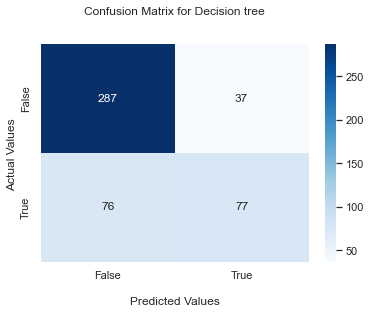

In [94]:
print('\n')
ax = sns.heatmap(confusion_matrix(Y_test, pred_), annot=confusion_matrix(Y_test, pred_), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decision tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


print(classification_report(Y_test, pred_))

([<matplotlib.axis.XTick at 0x168133945e0>,
 [Text(0, 0, 'Quarterly Rating_1'),
  Text(1, 0, 'Total Business Value'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'City'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Joining Designation_3'),
  Text(6, 0, 'Quarterly Rating_2'),
  Text(7, 0, 'Joining Designation_1'),
  Text(8, 0, 'Gender'),
  Text(9, 0, 'Education_Level_1'),
  Text(10, 0, 'Grade_2'),
  Text(11, 0, 'Joining Designation_2'),
  Text(12, 0, 'Joining Designation_4'),
  Text(13, 0, 'Quarterly Rating_3'),
  Text(14, 0, 'Grade_1'),
  Text(15, 0, 'Education_Level_0'),
  Text(16, 0, 'Education_Level_2'),
  Text(17, 0, 'Income_inc'),
  Text(18, 0, 'Grade_4'),
  Text(19, 0, 'Joining Designation_5'),
  Text(20, 0, 'Grade_3'),
  Text(21, 0, 'Quarterly Rating_4'),
  Text(22, 0, 'Grade_5')])

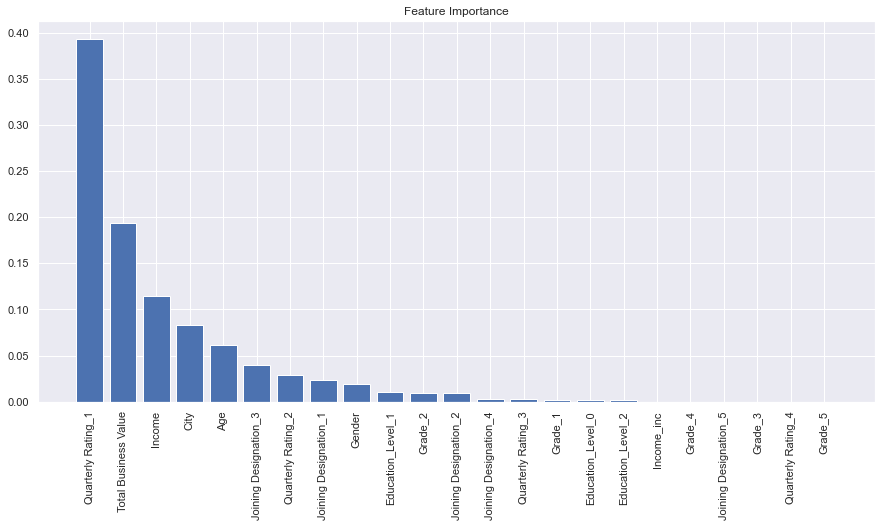

In [95]:
# Feature Importance
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) 

### Hyperparameter Tuning 

In [96]:

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop =5)]


rf = RandomForestClassifier(random_state = 1)

random_grid = {'n_estimators': n_estimators,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train,Y_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10], 'min_samples_leaf': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5]} 

Best Parameters:  {'n_estimators': 15, 'min_samples_split': 7, 'min_samples_leaf': 3}  



## 3.1 Model Building Using RandomForest Classifier(Bagging)

In [97]:
bagging_classifier = BaggingClassifier(
base_estimator=rf,
n_estimators =15,
random_state = 1,
oob_score=True
)


In [98]:
model1 = bagging_classifier.fit(X_train, Y_train)

In [99]:
print('*********************************************')

print('Out of Box Score for Random Forest Classifier\n\n');

print(model1.oob_score_)

print('*********************************************')

*********************************************
Out of Box Score for Random Forest Classifier


0.8025210084033614
*********************************************


Train results for Random Forest Classifier 
*********************************************
Classification Report for Random Forest Classifier


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1292
           1       0.97      0.87      0.91       612

    accuracy                           0.95      1904
   macro avg       0.95      0.93      0.94      1904
weighted avg       0.95      0.95      0.95      1904

*********************************************


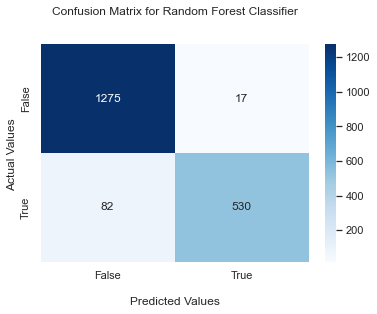

In [100]:
print('Train results for Random Forest Classifier ')
pred = model1.predict(X_train)
print('*********************************************')
print('Classification Report for Random Forest Classifier\n\n');
print((classification_report(Y_train, pred)))
print('*********************************************')
ax = sns.heatmap(confusion_matrix(Y_train, pred), annot=confusion_matrix(Y_train, pred), fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Random Forest Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

Test results for Random Forest Classifier 
*********************************************


Classification Report for Random Forest Classifier




              precision    recall  f1-score   support

           0       0.83      0.94      0.88       324
           1       0.81      0.60      0.69       153

    accuracy                           0.83       477
   macro avg       0.82      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477



*********************************************




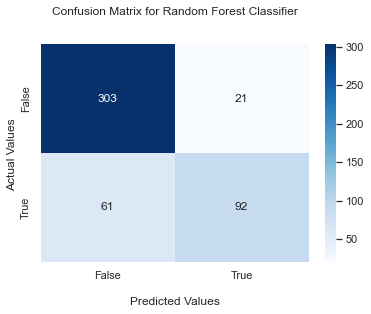

*********************************************


In [101]:
print('Test results for Random Forest Classifier ')
pred_test = model1.predict(X_test)

print('*********************************************')
print('\n')
print('Classification Report for Random Forest Classifier\n\n');
print('\n')
print((classification_report(Y_test, pred_test)))
print('\n')
print('*********************************************')
print('\n')
ax = sns.heatmap(confusion_matrix(Y_test, pred_test), annot=confusion_matrix(Y_test, pred_test), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print('*********************************************')

## 3.2 Model Building Using Gradient Boosting Classifier(Boosting)

#### As Boosting Algorithms are Sensitive to outliers so we use the data without outliers

* As number of estimators and learning rate is inversely proportional to each other. so we are taking some large amount of estimators as Learning rate is small

In [102]:
model3 = GBC(n_estimators=23, learning_rate=0.1, max_depth=9, random_state=0,verbose = 1).fit(X1_train, Y1_train)

      Iter       Train Loss   Remaining Time 
         1           1.0047            0.37s
         2           0.9233            0.34s
         3           0.8507            0.35s
         4           0.7982            0.33s
         5           0.7432            0.32s
         6           0.6917            0.31s
         7           0.6502            0.28s
         8           0.6158            0.25s
         9           0.5872            0.23s
        10           0.5625            0.20s
        20           0.3682            0.04s


Train results for Gradient Boosting Classifier 
*********************************************


Classification Report for Gradient Boosting Classifier




              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1234
           1       1.00      0.85      0.92       402

    accuracy                           0.96      1636
   macro avg       0.97      0.92      0.95      1636
weighted avg       0.96      0.96      0.96      1636



*********************************************




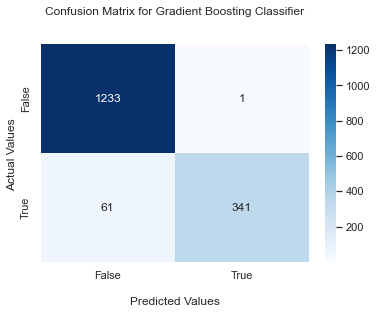

In [103]:
print('Train results for Gradient Boosting Classifier ')
pred_train = model3.predict(X1_train)

print('*********************************************')
print('\n')
print('Classification Report for Gradient Boosting Classifier\n\n');
print('\n')
print((classification_report(Y1_train, pred_train)))
print('\n')
print('*********************************************')
print('\n')
ax = sns.heatmap(confusion_matrix(Y1_train, pred_train), annot=confusion_matrix(Y1_train, pred_train), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Gradient Boosting Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Test results for Gradient Boosting Classifier 


*********************************************


Classification Report for Gradient Boosting Classifier


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       308
           1       0.52      0.33      0.40       101

    accuracy                           0.76       409
   macro avg       0.66      0.61      0.63       409
weighted avg       0.73      0.76      0.74       409



*********************************************




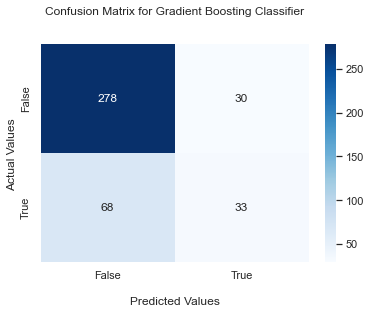

In [104]:

print('Test results for Gradient Boosting Classifier ')
print('\n')
pred_test = model3.predict(X1_test)
print('*********************************************')
print('\n')
print('Classification Report for Gradient Boosting Classifier\n\n');
print((classification_report(Y1_test, pred_test)))
print('\n')
print('*********************************************')
print('\n')
ax = sns.heatmap(confusion_matrix(Y1_test, pred_test), annot=confusion_matrix(Y1_test, pred_test), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Gradient Boosting Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

* Training Accuracy >> Test Accuracy ,We can clearly say Gradient boosting classifier is highly overfitting

## Model Building Using XG Boost

In [105]:
param = {'max_depth' : 9, 'eta' : 0.1, 'n_estimators' : 24}
model4 = xgb.XGBClassifier(**param)
model4.fit(X1_train, Y1_train,eval_metric = ['mlogloss', 'merror'],verbose = True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=24, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Train results for XG Boost 
*********************************************


Accuracy Score:0.910757946210269


*********************************************


Classification Report for XG Boost


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1234
           1       0.95      0.67      0.79       402

    accuracy                           0.91      1636
   macro avg       0.93      0.83      0.87      1636
weighted avg       0.91      0.91      0.90      1636



*********************************************




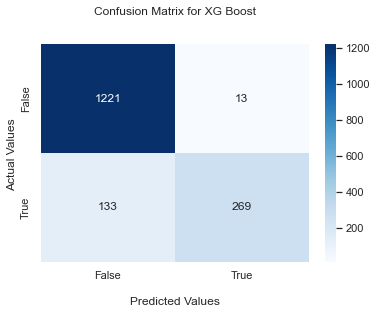

In [106]:
print('Train results for XG Boost ')
pred_train = model4.predict(X1_train)
print('*********************************************\n\n')
print('Accuracy Score:'+str(accuracy_score(Y1_train,pred_train)))
print('\n')
print('*********************************************')
print('\n')
print('Classification Report for XG Boost\n\n');
print((classification_report(Y1_train, pred_train)))
print('\n')
print('*********************************************')
print('\n')
ax = sns.heatmap(confusion_matrix(Y1_train, pred_train), annot=confusion_matrix(Y1_train, pred_train), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for XG Boost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Test results for XG Boost 


*********************************************


Classification Report for XG Boost




              precision    recall  f1-score   support

           0       0.81      0.82      0.82       324
           1       0.61      0.59      0.60       153

    accuracy                           0.75       477
   macro avg       0.71      0.71      0.71       477
weighted avg       0.75      0.75      0.75       477



*********************************************




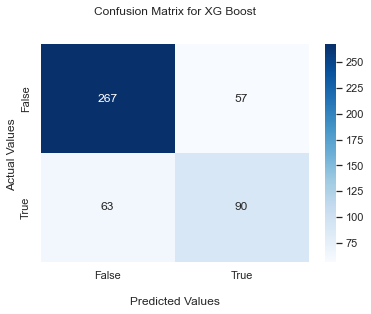

In [107]:
print('Test results for XG Boost ')
pred_test = model4.predict(X_test)
print('\n')
print('*********************************************')
print('\n')
print('Classification Report for XG Boost\n\n');
print('\n')
print((classification_report(Y_test, pred_test)))
print('\n')
print('*********************************************')
print('\n')
ax = sns.heatmap(confusion_matrix(Y_test, pred_test), annot=confusion_matrix(Y_test, pred_test), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for XG Boost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


* Training Accuracy >> Test Accuracy ,We can clearly say XG Boost classifier is highly overfitting

## Imbalance data treatment 

In [108]:
Y_train.value_counts(normalize='True')

0    0.678571
1    0.321429
Name: Attrition, dtype: float64

In [109]:
smt = SMOTE()

In [110]:
X_sm, Y_sm = smt.fit_resample(X_train, Y_train)
X1_sm, Y1_sm = smt.fit_resample(X1_train, Y1_train)

#### Evaluating results for data balanced using SMOTE for different values

In [111]:
# Random Forrest Classifier

print('****************************************************\n')
pred_sm_test=model1.predict(X_test)
print('Accuracy Score\n')
print(accuracy_score(Y_test,pred_sm_test))
print('\n')
print('****************************************************\n')
print('Confusion Matrix\n')
print(confusion_matrix(Y_test,pred_sm_test))
print('\n')
print('****************************************************\n')
print('Classification report \n')
print(classification_report(Y_test,pred_sm_test))
print('\n')

****************************************************

Accuracy Score

0.8280922431865828


****************************************************

Confusion Matrix

[[303  21]
 [ 61  92]]


****************************************************

Classification report 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       324
           1       0.81      0.60      0.69       153

    accuracy                           0.83       477
   macro avg       0.82      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477





In [112]:
# Gradient Boosting classifier
print('****************************************************\n')
pred_sm_test_1=model3.predict(X1_test)
print('Accuracy Score\n')
print(accuracy_score(Y1_test,pred_sm_test_1))
print('\n')
print('****************************************************\n')
print('Confusion Matrix\n')
print(confusion_matrix(Y1_test,pred_sm_test_1))
print('\n')
print('****************************************************\n')
print('Classification report \n')
print(classification_report(Y1_test,pred_sm_test_1))
print('\n')

****************************************************

Accuracy Score

0.7603911980440098


****************************************************

Confusion Matrix

[[278  30]
 [ 68  33]]


****************************************************

Classification report 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       308
           1       0.52      0.33      0.40       101

    accuracy                           0.76       409
   macro avg       0.66      0.61      0.63       409
weighted avg       0.73      0.76      0.74       409





In [113]:
#XG_Boost
print('****************************************************\n')
pred_sm_test_2=model4.predict(X1_test)
print('Accuracy Score\n')
print(accuracy_score(Y1_test,pred_sm_test_2))
print('\n')
print('****************************************************\n')
print('Confusion Matrix\n')
print(confusion_matrix(Y1_test,pred_sm_test_2))
print('\n')
print('****************************************************\n')
print('Classification report \n')
print(classification_report(Y1_test,pred_sm_test_2))
print('\n')

****************************************************

Accuracy Score

0.7555012224938875


****************************************************

Confusion Matrix

[[282  26]
 [ 74  27]]


****************************************************

Classification report 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       308
           1       0.51      0.27      0.35       101

    accuracy                           0.76       409
   macro avg       0.65      0.59      0.60       409
weighted avg       0.72      0.76      0.73       409





* Compared to all models Random Forest classifier gave pretty good results for balanced data using smote
* results are almost same before and after balancing data for all the models 

# 4.Results Evaluation

### Confusion Matrix:

Confusion matrix is a table that is often used to describe the performance of a classification model (or classifier) on a set of test data for which the true values are known

* True Positive: You predicted positive and it’s true.

* True Negative: You predicted negative and it’s true.

* False Positive: (Type 1 Error) You predicted positive and it’s false.

* False Negative: (Type 2 Error) You predicted negative and it’s True.

### Accuracy : 

Accuracy describes overall, how often the classifier correct.
    
Accuracy=(TP+TN)/Total 

### Sensitivity/Recall : 

When it’s actually yes, how often does it predict yes?

Recall = TP/(TP + FN).

### Precision:
    
When it predicts yes, how often is it correct?

Precision = TP/(TP + FP)

## 4.1 ROC AUC Curve & comments

In [114]:
# Decision tree classifier
y_ = dt.predict_proba(X_test)
pos_probs = y_[:, 1]
fpr_, tpr_, thresholds_ = roc_curve(Y_test, pos_probs)
roc_auc_ = auc(fpr_, tpr_)

In [115]:
#RandomForestClassifier
y = model1.predict_proba(X_test)
pos_probs = y[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, pos_probs)
roc_auc = auc(fpr, tpr)

In [116]:
# Gradient boosting Classifier
y1 = model3.predict_proba(X_test)
pos_probs1 = y1[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(Y_test, pos_probs1)
roc_auc1 = auc(fpr1, tpr1)

In [117]:
#XG Boost
y2 = model4.predict_proba(X_test)
pos_probs2 = y2[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(Y_test, pos_probs2)
roc_auc2 = auc(fpr2, tpr2)



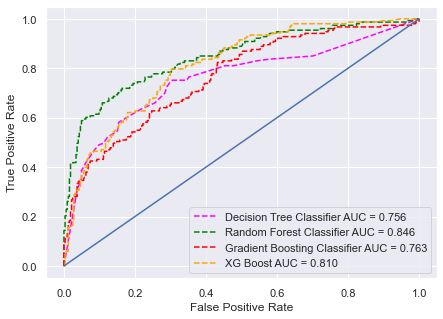

In [118]:
plt.figure(figsize=(7,5))
plt.plot(fpr_,tpr_, color='magenta',label = 'Decision Tree Classifier AUC = %0.3f' % roc_auc_,linestyle='dashed')
plt.plot(fpr,tpr, color='green',label = 'Random Forest Classifier AUC = %0.3f' % roc_auc,linestyle='dashed')
plt.plot(fpr1,tpr1, color='red',label = 'Gradient Boosting Classifier AUC = %0.3f' % roc_auc1,linestyle='dashed')
plt.plot(fpr2,tpr2, color='orange',label = 'XG Boost AUC = %0.3f' % roc_auc2,linestyle='dashed')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* Compared to all models Random Forest classifier has Higer Area under Curve value compared to all other models
* AUC value of 0.85 is accetable and good

## 4.2 Classification Report

* Out of all the models built Random Forest classifier has good precision,recall,f1-score 

In [119]:
Y_pred = model1.predict(X_test)
print('Classification Report:\n\n')
print(classification_report(Y_test,Y_pred))

Classification Report:


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       324
           1       0.81      0.60      0.69       153

    accuracy                           0.83       477
   macro avg       0.82      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

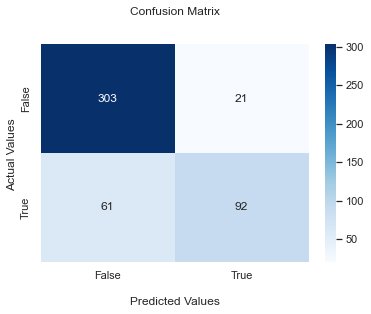

In [120]:
ax = sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=confusion_matrix(Y_test,Y_pred), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


* In the given context, False negitives are more important than False positives 
* False negitives can be controlled by setting the cutoff value to as low as possible
* Recall is metric that needs to be focussed in this given case

In [121]:
# predict probabilities
y = model1.predict_proba(X_test)
pos_probs = y[:, 1]
Y_pred=[1 if i >= 0.35 else 0 for i in pos_probs]

In [122]:
print('Classification Report:\n\n')
print(classification_report(Y_test,Y_pred))

Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       324
           1       0.68      0.71      0.69       153

    accuracy                           0.80       477
   macro avg       0.77      0.78      0.77       477
weighted avg       0.80      0.80      0.80       477



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

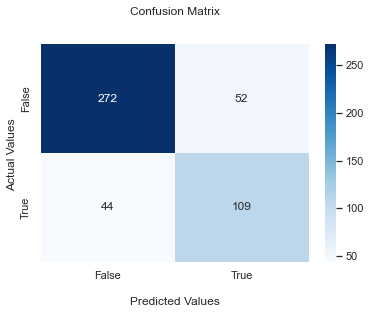

In [123]:
ax = sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=confusion_matrix(Y_test,Y_pred), fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

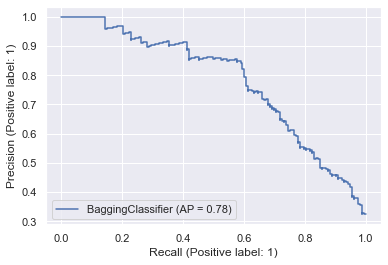

In [124]:
plot_precision_recall_curve(model1, X_test, Y_test)

# 5.Actionable Insights & Recommendations

* Employee Attrition is a very big problem faced by any organisation.Organisation will lose Valuable players with knowledge and Experience in their team. Analyze the root cause for attrition and take necessary actions 
* From the Analysis , Most people Working in OLA have not got any increase in income or their grade. Even the guys who have good business value are given quarterly rating as 1
* Working in such an toxic environment where growth and appreciation for the amount of work done is not there. Employee will sure lose their motivation and interest and starts looking ways to leave the company
* Increase the payscale of the drivers and promote them to higher grade considering their work
* Recognize people's work and start appreciating and rewarding them based on their good work
* Build a positive and flexible environment where the employees can freely share the problems they face and make sure they have proper work life balance 
* Most of the people leaving OLA are of high business Value. This will result in company's losses . We should retain such employees of higher bussiness value by offering perks,package
* Identify the cities in which there is more attrition rate . Analyze the root cause and take necessary actions 